In [96]:
import numpy as np

In [97]:
x=np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])

In [128]:
y=np.array([10,33,46,22,48,62,78,88,103,80,118,116,145,122,156])

In [129]:
df=np.column_stack((x,y))

In [130]:
df

array([[  1,  10],
       [  2,  33],
       [  3,  46],
       [  4,  22],
       [  5,  48],
       [  6,  62],
       [  7,  78],
       [  8,  88],
       [  9, 103],
       [ 10,  80],
       [ 11, 118],
       [ 12, 116],
       [ 13, 145],
       [ 14, 122],
       [ 15, 156]])

In [131]:
import matplotlib.pyplot as plt

In [132]:
x=np.array([0]*15)
y=np.array([0]*15)
for i in range(15):
    x[i]=df[i][0]
    y[i]=df[i][1]

In [133]:
x,y

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 array([ 10,  33,  46,  22,  48,  62,  78,  88, 103,  80, 118, 116, 145,
        122, 156]))

In [134]:
np.delete(x,6,axis=0)
np.delete(x,7,axis=0)
np.delete(x,11,axis=0)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 13, 14, 15])

In [135]:
np.delete(y,6,axis=0)
np.delete(y,7,axis=0)
np.delete(y,11,axis=0)

array([ 10,  33,  46,  22,  48,  62,  78,  88, 103,  80, 118, 145, 122,
       156])

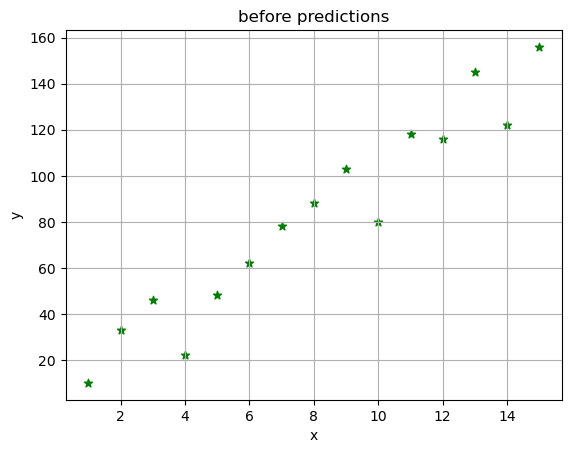

In [136]:
plt.scatter(x,y,c='g',marker='*')
plt.xlabel('x')
plt.ylabel('y')
plt.title('before predictions')
plt.grid(True)

In [137]:
w=11
b=5
pred=[0]*15
for i in range(15):
    pred[i]=w*x[i]+b
    

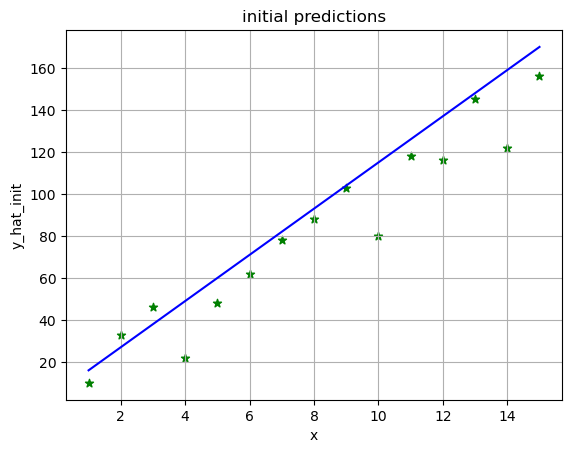

In [138]:
plt.plot(x,pred,c='b')
plt.scatter(x,y,c='g',marker='*')
plt.xlabel('x')
plt.ylabel('y_hat_init')
plt.title('initial predictions')
plt.grid(True)

In [139]:
learning_rate=0.05

In [140]:
def compute_cost(x,y,w,b):
    m=len(x)
    cost=0
    for i in range(m):
        cost+=((w*x[i]+b)-y[i])**2
    return cost

In [141]:
#changing w while b is fixed at 0 
W=[0]*1000
for i in range(1000):
    W[i]=W[i]+i*learning_rate

In [142]:
cost=[0]*1000

In [143]:
for i in range(1000):
    cost[i]=cost[i]+compute_cost(x,y,W[i],b)

In [144]:
cost

[116504.0,
 115315.70000000001,
 114133.59999999999,
 112957.70000000001,
 111788.0,
 110624.5,
 109467.2,
 108316.1,
 107171.20000000001,
 106032.5,
 104900.0,
 103773.7,
 102653.6,
 101539.70000000001,
 100431.99999999999,
 99330.5,
 98235.2,
 97146.09999999999,
 96063.20000000001,
 94986.5,
 93916.0,
 92851.69999999998,
 91793.6,
 90741.7,
 89696.0,
 88656.5,
 87623.2,
 86596.09999999999,
 85575.2,
 84560.5,
 83552.0,
 82549.7,
 81553.59999999999,
 80563.7,
 79580.0,
 78602.5,
 77631.2,
 76666.1,
 75707.2,
 74754.5,
 73808.0,
 72867.69999999998,
 71933.6,
 71005.70000000001,
 70084.0,
 69168.5,
 68259.19999999998,
 67356.1,
 66459.2,
 65568.5,
 64684.0,
 63805.700000000004,
 62933.6,
 62067.7,
 61208.0,
 60354.5,
 59507.2,
 58666.1,
 57831.2,
 57002.5,
 56180.0,
 55363.7,
 54553.6,
 53749.69999999999,
 52952.0,
 52160.5,
 51375.2,
 50596.1,
 49823.2,
 49056.5,
 48296.0,
 47541.7,
 46793.6,
 46051.7,
 45316.0,
 44586.5,
 43863.2,
 43146.1,
 42435.2,
 41730.5,
 41032.0,
 40339.7,
 396

Text(9.600000000000001, 202033.6, 'Min_Cost')

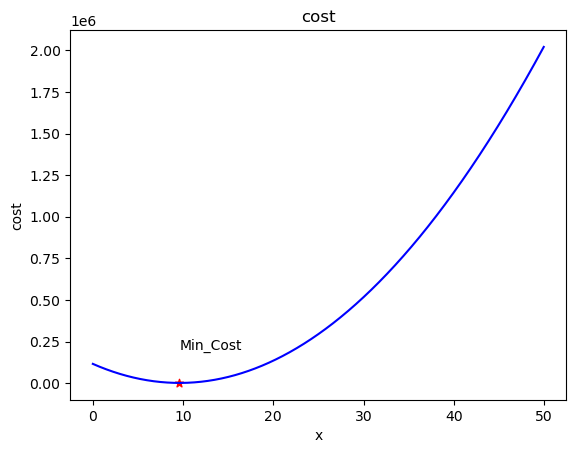

In [152]:
plt.plot(W,cost,c='b')
plt.title('cost')
plt.xlabel('x')
plt.ylabel('cost')
plt.scatter(W[192],min(cost),marker='*',c='r')
plt.text(W[192],min(cost)+200000,'Min_Cost')

In [146]:
min(cost)

2033.6000000000004

In [147]:
cost.index(min(cost))

192

In [149]:
W[192]

9.600000000000001

In [150]:
def compute_cost(x,y,w,b):
    m=len(x)
    cost=0
    for i in range(m):
        cost+=((w*x[i]+b)-y[i])**2
    return cost/(2*m)

In [151]:
def error(w,b,x):
    y_hat=w*x+b
    error=(y_hat-y)
    return error

In [120]:
#gradient descent
w=10
b=0
learning_rate=0.05
m=15
def gradient_descent(x,y,w,b):
    current_cost=compute_cost(x,y,w,b)
    w = w - ((learning_rate)*((1/m)*sum((error(w,b,x)*x))))
    b = b - ((learning_rate)*((1/m)*sum(error(w,b,x))))
    new_cost=compute_cost(x,y,w,b)
    if new_cost<current_cost:
        return gradient_descent(x,y,w,b)
    else:
        return w,b

In [121]:
gradient_descent(x,y,w,b)

(18.46666666666667, -2.3566666666666674)

In [122]:
compute_cost(x,y,49.8,-14.9)

55486.471666666665